## Week 1 Assignment

My goal is to open and explore the CAWa cropType dataset.

In [1]:
# Import the libraries used in the example
import pandas as pd
import geopandas as gpd

In [2]:
# Per the example, read and add shapefile to notebook
crops = gpd.read_file('CAWa_cropType.zip')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


Hmm. I'm not sure what that error means, but it also [appears](https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html) when I open the GeoPandas documentation, so maybe it's okay? Let's see if I can read the data / do anything with it...

In [3]:
type(crops)

geopandas.geodataframe.GeoDataFrame

This workbook can read the file! What's in it?

In [4]:
crops.head(2)

,sampler,country,region,date,year,label_1,label_2,area,geometry
0,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,159710.395957,"POLYGON ((71.53066 40.49702, 71.53303 40.49595..."
1,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,193109.525223,"POLYGON ((71.54027 40.49276, 71.54520 40.49053..."


Each row is a polygon (defined by points with coordinates), its "administrative" location, its area (this should be redundant with the polygon, but nice to have already calculated... and could be helpful for checking), a date, and two "labels": one a type of crop and the other probably a bucket of temporal options (e.g. summer crop, winter crop, double crop).

In [5]:
print(crops.shape)
crops.info()

(8435, 9)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8435 entries, 0 to 8434
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sampler   8435 non-null   object  
 1   country   8435 non-null   object  
 2   region    8435 non-null   object  
 3   date      8435 non-null   object  
 4   year      8435 non-null   object  
 5   label_1   8435 non-null   object  
 6   label_2   8435 non-null   object  
 7   area      8435 non-null   float64 
 8   geometry  8435 non-null   geometry
dtypes: float64(1), geometry(1), object(7)
memory usage: 593.2+ KB


Looks like 8435 polygons ("fields") with nine pieces of information about each. Those objects... are they strings? 

In [6]:
print(type(crops.region[1]))
print(type(crops.date[1]))
print(type(crops.year[1]))
print(type(crops.label_1[1]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Yes. How many different countries and regions are here?

In [7]:
# The NumPy option seemed like the best from https://www.geeksforgeeks.org/python-get-unique-values-list/
import numpy as np
print(np.unique(crops.country))
print(np.unique(crops.region))

['Tajikistan' 'Uzbekistan']
['Dushanbe' 'Fergana' 'Kashkadarya' 'Khorezm' 'Samarkand']


How many different crops and growing patterns?

In [8]:
print(np.unique(crops.label_1))
print(len(np.unique(crops.label_1)))
print(np.unique(crops.label_2))

['alfalfa' 'alfalfa-maize' 'beans' 'cabbages-maize' 'carrots' 'cotton'
 'cotton-other' 'cotton-rice' 'fallow' 'maize' 'melons' 'oats' 'onions'
 'onions-maize' 'orchard' 'potato-maize' 'potatoes' 'pumpkin' 'rice'
 'rice-vegetables' 'soy' 'sunflower' 'tomatoes' 'vegetables'
 'vegetables-maize' 'vineyard' 'wheat' 'wheat-barley' 'wheat-beans'
 'wheat-broom' 'wheat-carrot' 'wheat-carrots' 'wheat-cotton' 'wheat-maize'
 'wheat-melons' 'wheat-other' 'wheat-rice' 'wheat-sorghum' 'wheat-soy'
 'wheat-vegetables']
40
['double' 'fallow' 'permanent' 'summer' 'unclear' 'winter']


Let's look at the distribution of crops by what's growing...

In [9]:
crops.label_1.value_counts()

cotton              4025
wheat               1596
wheat-other         1402
wheat-rice           314
orchard              234
rice                 167
wheat-maize          137
fallow               128
maize                126
alfalfa              121
vineyard              52
wheat-vegetables      34
vegetables            32
wheat-sorghum         11
wheat-broom           11
melons                 9
carrots                3
rice-vegetables        3
sunflower              2
onions                 2
potatoes               2
wheat-cotton           2
wheat-carrot           2
potato-maize           2
vegetables-maize       2
beans                  2
oats                   1
tomatoes               1
onions-maize           1
wheat-beans            1
wheat-barley           1
wheat-melons           1
alfalfa-maize          1
cabbages-maize         1
wheat-carrots          1
soy                    1
wheat-soy              1
cotton-rice            1
cotton-other           1
pumpkin                1


So really only a few major crops, and then many single fields with unique classification. The distribution might be easier to see as a pie chart...

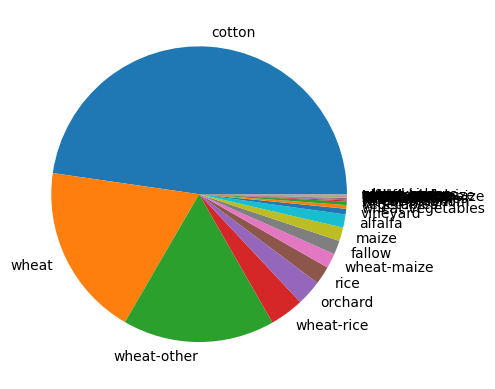

In [10]:
# Lerning to make pie charts: https://www.w3schools.com/python/matplotlib_pie_charts.asp
# Getting names from value_counts: https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
import matplotlib.pyplot as plt
plt.pie(crops.label_1.value_counts(),labels = crops.label_1.value_counts().index.tolist())
plt.show() 

Cotton and wheat are the winners. Now I'm interested in those orchards. Where are they?

In [11]:
orchards = crops[crops.label_1 == 'orchard']
orchards.region.value_counts()

Fergana        128
Kashkadarya     85
Samarkand       19
Khorezm          1
Dushanbe         1
Name: region, dtype: int64

Now I want to make a map!

<AxesSubplot: >

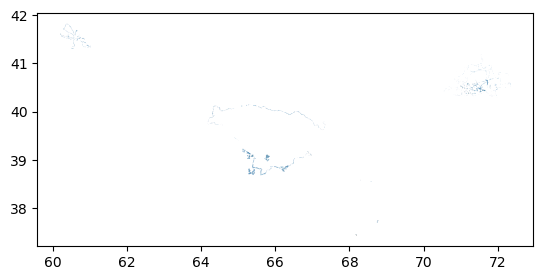

In [12]:
crops.plot()

Interesting! Looks like these regions are not all next to each other?
Let's zoom in on one...

<AxesSubplot: >

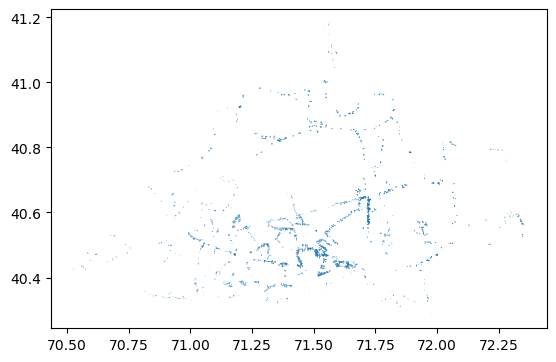

In [13]:
fergana = crops[crops.region == "Fergana"]
fergana.plot()

What neat patterns! Are these adjacent to irrigation canals? I need to learn how to do more things!

Where are the orchards?

<AxesSubplot: >

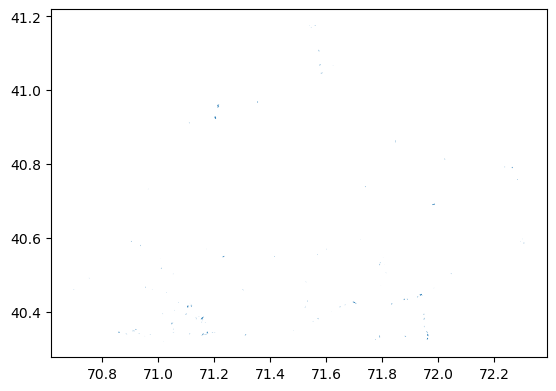

In [14]:
fergana_orchards = fergana[fergana.label_1 == "orchard"]
fergana_orchards.plot()

There appears to be some clustering of orchards (two groups in the south); overlaying with altitude, soil type, etc might be interesting.